In [1]:
from modularity_based import *
from spectral import *
from statistical import *

import igraph as ig 
import networkx as nx

%matplotlib inline

In [2]:
# Simple graph example
ER = ig.Graph.Erdos_Renyi(n=100, p=0.5)

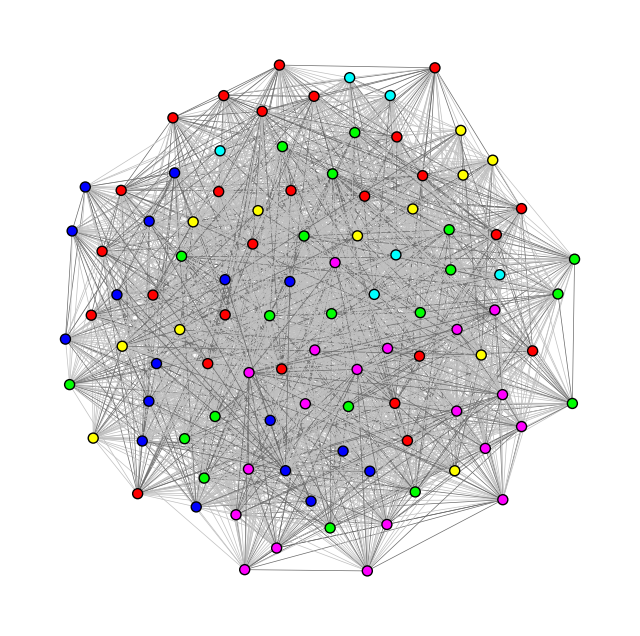

In [3]:
clusters_louv = louvain(G=ER)

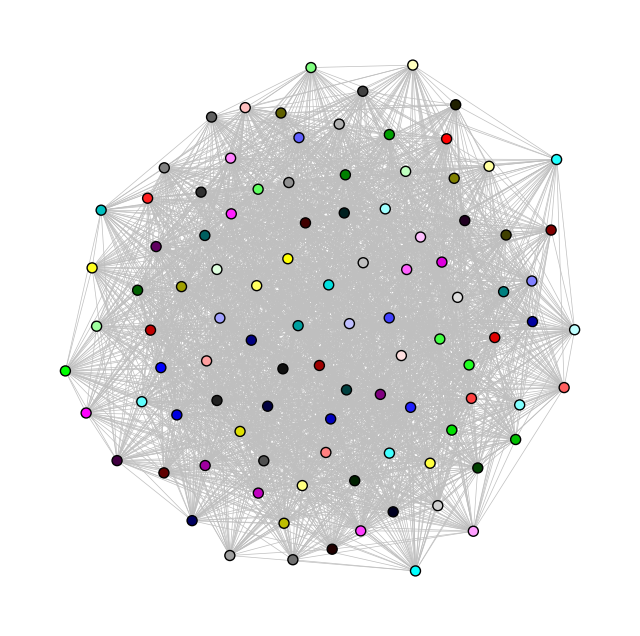

In [4]:
clusters_leid = leiden(G=ER)

In [5]:
G = nx.karate_club_graph() 

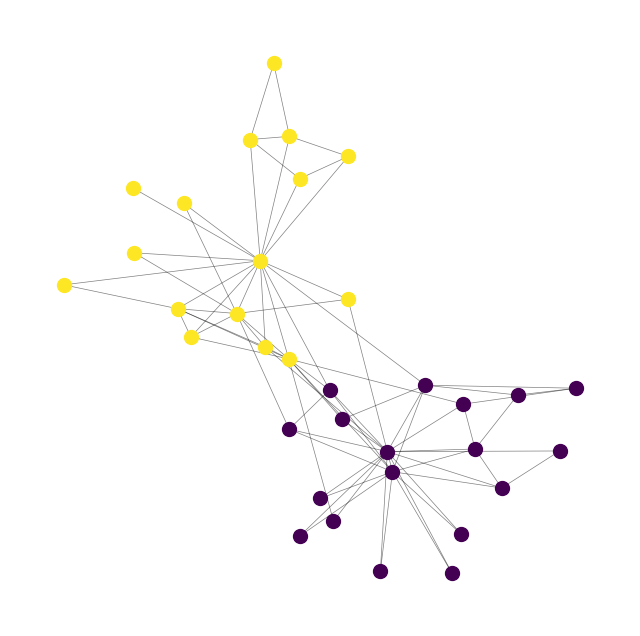

In [6]:
clusters_spec = spectral(G, 2)